In [1]:
import spikeextractors as se
import spikewidgets as sw

import numpy as np
import matplotlib.pyplot as plt
# allow to reload module
import importlib

import spike_data

In [2]:
#recording = se.MEArecRecordingExtractor()
#geom = np.asarray(recording.get_channel_locations())

geom, recording, spike_frame_channel_array = spike_data.create_simulated_mea_rec(3)

'end_frame' set to 1000


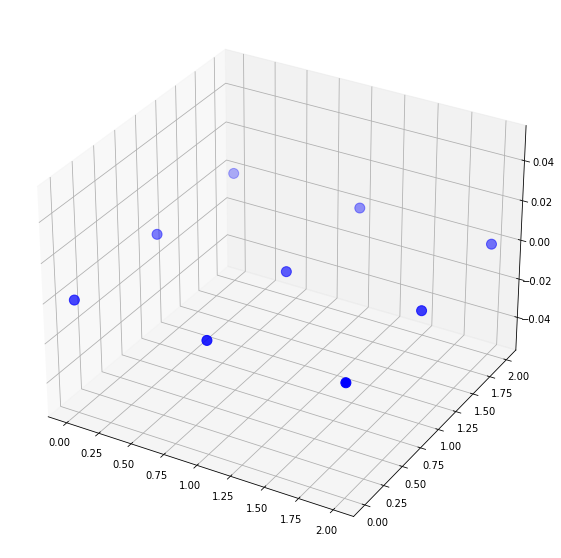

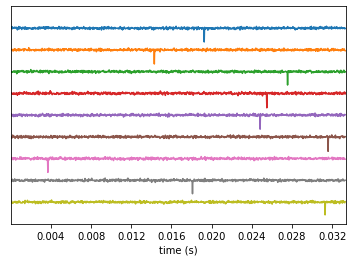

In [3]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(geom[:,0], geom[:,1], geom[:,2], c='blue', s=100);

w_ts_geom = sw.plot_timeseries(recording, trange=[0, 1])

In [4]:
importlib.reload(spike_data)
# create strucute containing added padded channels around geom
padded_channels, observed_channels, corresponding_channels_ids = spike_data.make_padded_channels(geom, num_pads = 2)

In [5]:
padded_channels.shape

(225, 3)

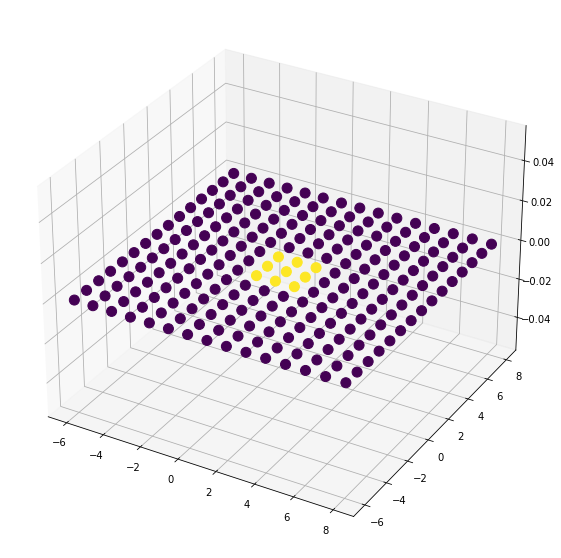

In [6]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(padded_channels[:,0], padded_channels[:,1], c=observed_channels, s=100, alpha=1);

In [7]:
spike_frame_channel_array

[[111, 6],
 [429, 1],
 [543, 7],
 [578, 0],
 [745, 4],
 [765, 3],
 [827, 2],
 [939, 8],
 [948, 5]]

In [8]:
neighbouring_channels = spike_data.get_neighbours_channels(padded_channels, observed_channels, spike_channel_radius = 5)

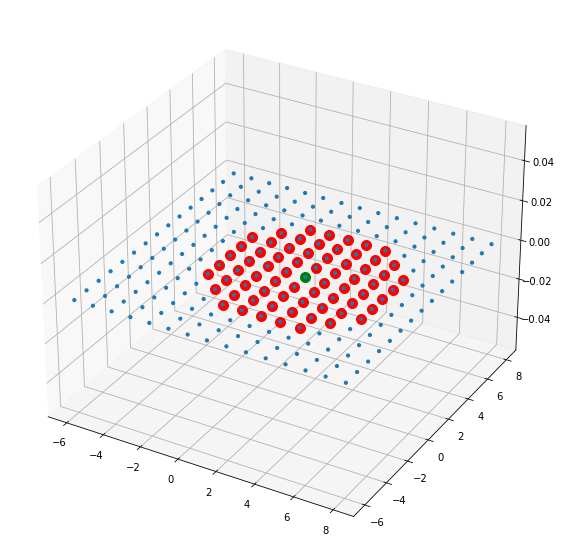

In [10]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(padded_channels[:,0], padded_channels[:,1], s=10, alpha=1);

recorded_channels_ids = [key for key in neighbouring_channels.keys()]

display_rec_channel = recorded_channels_ids[7]
for channel in neighbouring_channels[display_rec_channel]:
    ax.scatter(padded_channels[channel][0], padded_channels[channel][1], c=('g' if channel==display_rec_channel else 'r'), s=100)

In [11]:
importlib.reload(spike_data)

waveforms_list, channel_ids_list = spike_data.extract_waveforms(recording, spike_frame_channel_array, padded_channels, neighbouring_channels, corresponding_channels_ids)

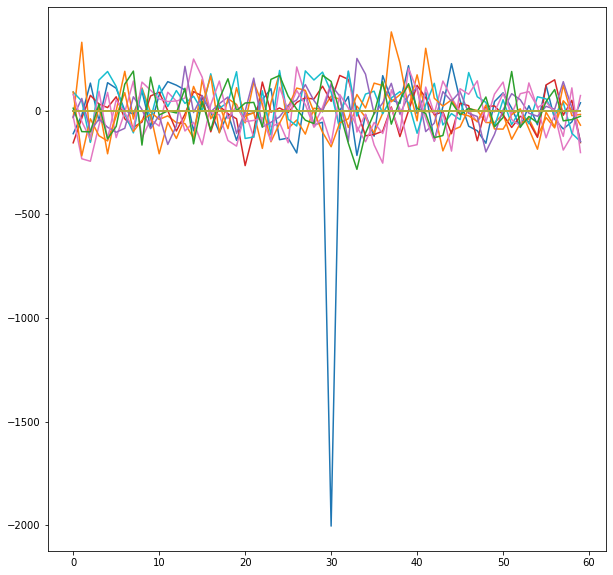

In [12]:
fig = plt.figure(figsize=(10,10))

for waveform in waveforms_list[0]:
       plt.plot(waveform)

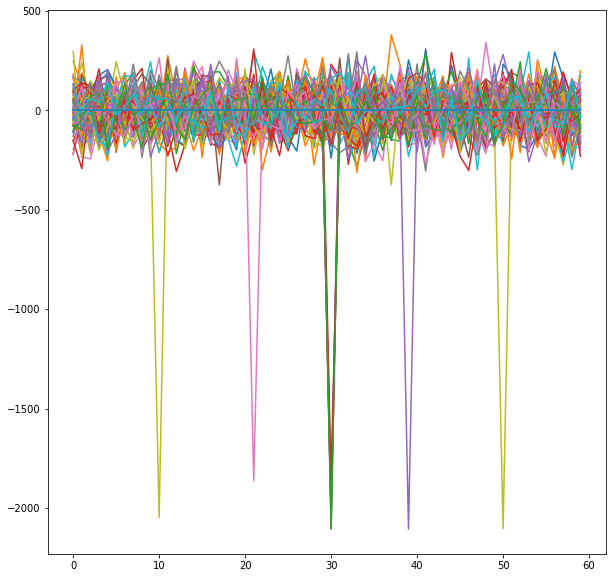

In [13]:
fig = plt.figure(figsize=(10,10))

for waveforms in waveforms_list:
    for waveform in waveforms:
        plt.plot(waveform)